# Z Hunt Tutorial

This program was written in Python 3.6 using Jupyter Notebooks and displays a graphical interface for analyzing the data produced by [Z-Hunt II](http://www.jbc.org/content/267/17/11846.full.pdf), an updated version of [Z-Hunt](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1167176/pdf/emboj00173-0317.pdf) that analyzes a given DNA sequence and looks up for regions with potential to form Z-DNA. As mentioned by the authors:

>" The computer program (Z-Hunt-II) developed for this study uses a rigorous thermodynamic search strategy to map the occurrenceof left-handed Z-DNA in genomic sequences. The search algorithm has been optimized to search large sequences for the potential occurrence of Z-DNA, taking into account sequence type, length, and cooperativity for a given stretch of potential Z-DNA-forming nucleotides."

### Z-Score

To do this the program computes for each base pair of the given DNA sequence, a value called Z-Score.

> "In practical terms, the Z-Score relates the ability for a given sequence to adopt the Z conformation relative to a random sequence. We can also interpret the Z-Score as the number of random sequences that must be searched to finda nucleotide sequence that isas good or better at forming Z-DNA than the sequence in question."

Z-Hunt II accepts $5$ arguments to run:

- *DNA*: as a sequence made up A, T, G and C.
- *windowsize*: the length of the search window.
- *minsize*
- *maxsize*
- *filename*: the name of the text file with the results.

Using the user interface, these arguments are defined by changing the values inside of text windows. **The default values of: *windowsize, minsize* and *maxsize* don't need to be necessarily changed by the user** (they replicate correctly the results shown by the published articles). In the end, the  program is very simple to use and requires the user to only input a DNA sequence and a name (for the results). 

- To call the program, click the Jupyter logo in the top left corner of the screen to open the directory. 
- Select the file Execute.ipynb to open it.
- Click inside cell and run it by pressing the **RUN** button (as shown below) or pressing **CRTL+ENTER** in your keyboard.

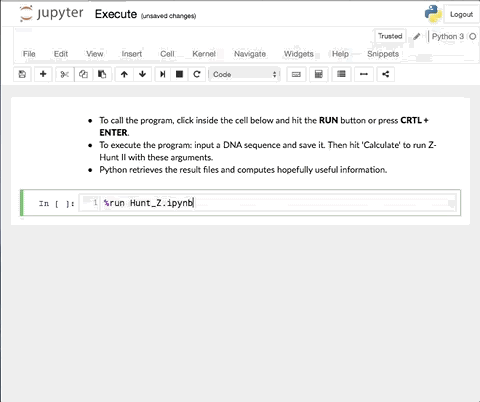

In [53]:
Image(filename='RunningProgram.gif.png')

Be sure to always press the two buttons to save the DNA and Calculate as shown below, otherwise new results aren't produced. (A bit of an error from me to not have done just one).

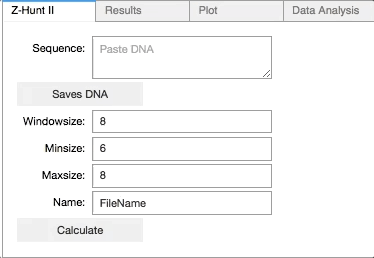

In [50]:
from IPython.display import Image
Image(filename='Executing.gif.png')

Under the hood Z-Hunt-II creates a text file named: *filename*.txt.Z-Score with the results. This file is automatically read by Python as a DataFrame (a tabular data type) and saved as *data*. After pressing of buttons, this *data* is used by different functions to compute plots and tables. The outputs of the buttons are arranged inside 5 tabs. 

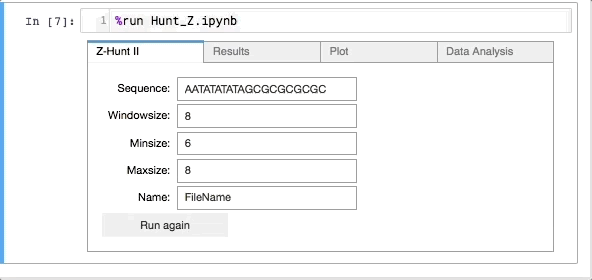

In [57]:
Image(filename="results.gif.png")

The program contains additional tools for analyzing the data: it can display statistics of the data columns, plots data columns against each other, shows the DNA sequence at a given position and other things. Particulary useful is the comparison between the computed sequences. 

### Interactive Plot

The results from all computed sequences can be seen interactively using this feature. One can choose to toogle on and off different plots, download the graph and zoom in or out of the plane.

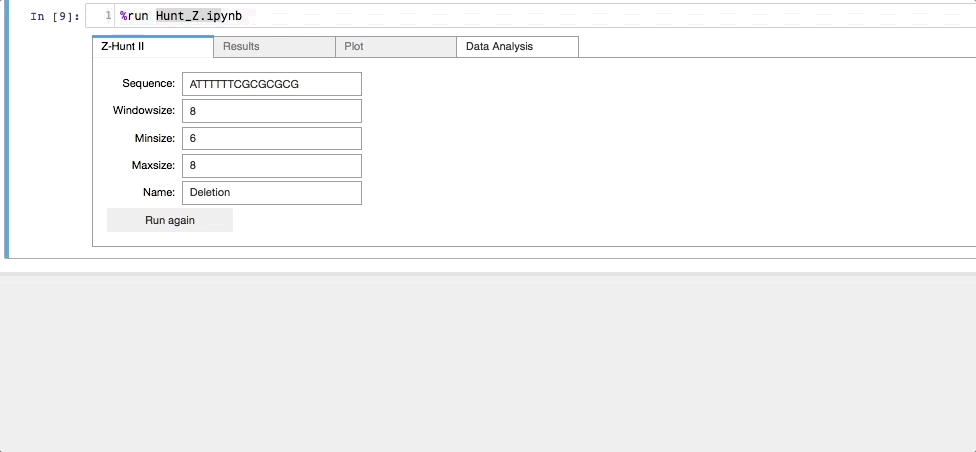

In [64]:
Image(filename="interactiveplot.gif.png")

For extremely big sequences, some of the button outputs may take a *while* to compute (this makes it look as if nothing is happenning), some of them may even crash if the sequence is too big.  For this reason, the program connects to a server called plotly that can be a bit more reliable. This is currently available in the button **Top 10** and **Interactive Comparison** (main feature). Be sure to click all required buttons (like defining the DNA). 

The functions do not execute automatically. Every time a new DNA sequence is defined, to calculate, update the plot or the table one needs to click the buttons again. I did it like this because computing all at once is very inefficient for big sequences.

## For curiosity
### Some additional info

For curiosity, the program uses by default a search window (*windowsize*) of size $8$ to analyze the DNA and compute the results. It seems interesting to see what are the values assigned by Z-Hunt II to all possible DNA sequence of this length. We can use python to inspect this. 

All possible sequences of length 8 can be defined by:

In [7]:
import itertools
all_possible_8 = [''.join(output) for output in itertools.product('ATCG', repeat=8)]
all_possible_8

['AAAAAAAA',
 'AAAAAAAT',
 'AAAAAAAC',
 'AAAAAAAG',
 'AAAAAATA',
 'AAAAAATT',
 'AAAAAATC',
 'AAAAAATG',
 'AAAAAACA',
 'AAAAAACT',
 'AAAAAACC',
 'AAAAAACG',
 'AAAAAAGA',
 'AAAAAAGT',
 'AAAAAAGC',
 'AAAAAAGG',
 'AAAAATAA',
 'AAAAATAT',
 'AAAAATAC',
 'AAAAATAG',
 'AAAAATTA',
 'AAAAATTT',
 'AAAAATTC',
 'AAAAATTG',
 'AAAAATCA',
 'AAAAATCT',
 'AAAAATCC',
 'AAAAATCG',
 'AAAAATGA',
 'AAAAATGT',
 'AAAAATGC',
 'AAAAATGG',
 'AAAAACAA',
 'AAAAACAT',
 'AAAAACAC',
 'AAAAACAG',
 'AAAAACTA',
 'AAAAACTT',
 'AAAAACTC',
 'AAAAACTG',
 'AAAAACCA',
 'AAAAACCT',
 'AAAAACCC',
 'AAAAACCG',
 'AAAAACGA',
 'AAAAACGT',
 'AAAAACGC',
 'AAAAACGG',
 'AAAAAGAA',
 'AAAAAGAT',
 'AAAAAGAC',
 'AAAAAGAG',
 'AAAAAGTA',
 'AAAAAGTT',
 'AAAAAGTC',
 'AAAAAGTG',
 'AAAAAGCA',
 'AAAAAGCT',
 'AAAAAGCC',
 'AAAAAGCG',
 'AAAAAGGA',
 'AAAAAGGT',
 'AAAAAGGC',
 'AAAAAGGG',
 'AAAATAAA',
 'AAAATAAT',
 'AAAATAAC',
 'AAAATAAG',
 'AAAATATA',
 'AAAATATT',
 'AAAATATC',
 'AAAATATG',
 'AAAATACA',
 'AAAATACT',
 'AAAATACC',
 'AAAATACG',
 'AAAATAGA',

An advantage of having defined it in this way is that *all_possible_8* has an order. One could analyze how the Z-Scores changes as the percentage of the bases in the oligonucleotides vary.  

It starts as:
- 'AAAAAAAA'
- 'AAAAAAAT'
- 'AAAAAAAC'
- 'AAAAAAAG'

And ends like:

- 'GGGGGGGA',
- 'GGGGGGGT',
- 'GGGGGGGC'
- 'GGGGGGGG'


To take a look of all these sequences using the program, we concatenate all elements together to a single sequence. It contains $524288$ bases.

In [13]:
whole_sequence = ''.join(all_possible_8)
len(whole_sequence)

524288

Running the program with this sequence and displaying the first 20 highest possible results (using a search window of $8$), we see that:

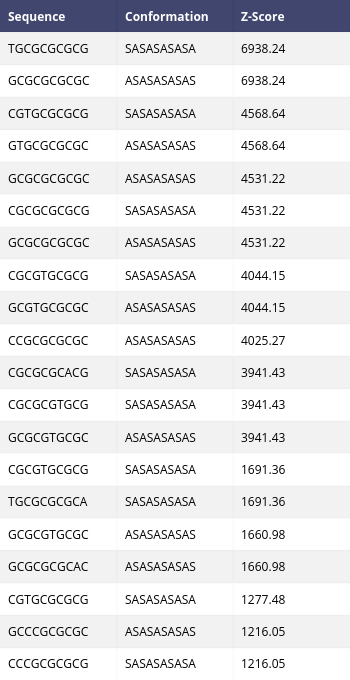

In [40]:
Image('largest-table.png')

The highest Z-Score returned by Z-Hunt II is $6938.24$ $kb$ and corresponds to the sequences *TGCGCGCG* and *GCGCGCGC*. Observing the conformation of these sequences we see that in all cases they bases are strictly intercalated: *syn-anti* bzw. *anti-syn*. G seems to always be in an *anti* conformation.

Now let's take a look to the plot of the whole sequence.

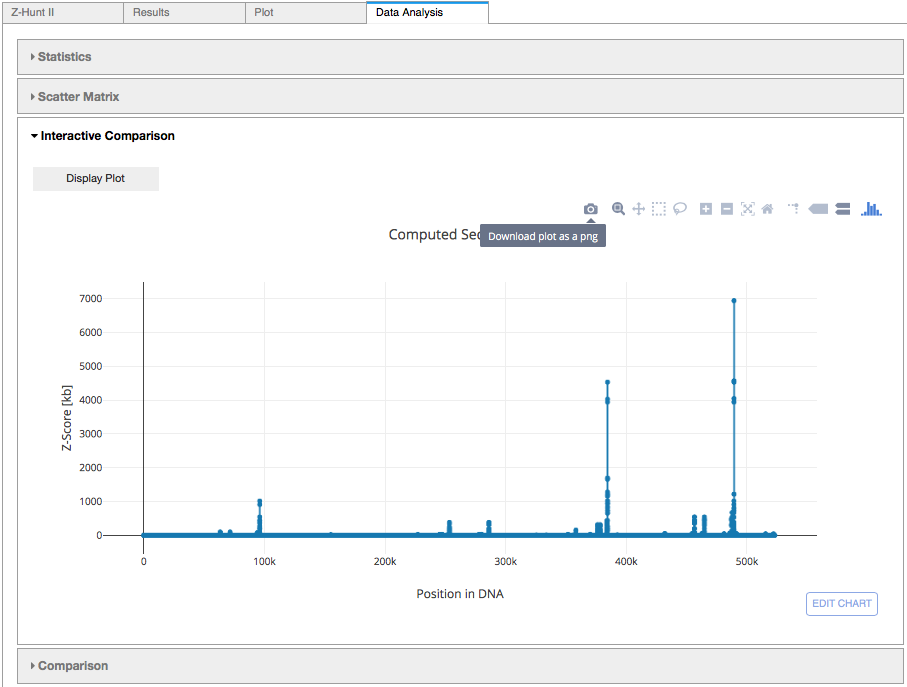

In [31]:
Image("exampleinteractive.png")

However, eventhough I expected the search window of $8$ to be entirety of the analyzed DNA, we see that the program does not only take into account that length, but the surroundings of the analyzed window. Isolated sequences of CGCGCGCG- have a higher Z-Score than sequences that contain variations. As seen vaguely in the GIF file below: the isolated sequence CGCGCGCGCG.... has a Z-Score [kb] of about 16000, around 16 times bigger than than the ACGCG... and ...CCGCGA


Whereas in the results above, the same pattern (but shorter) is assigned a way lower value. 

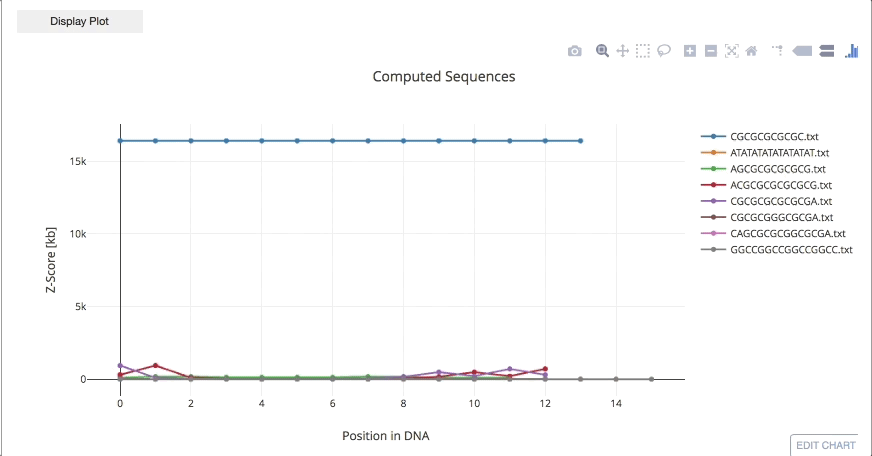

In [70]:
Image(filename="int_plot.gif.png")

In any case, the sequences corresponding to the most prominent local maxima all contain a high percentage of the bases G and C. 'Uninterrupted chains' of intercalated G and C are given extremely high values and are predicted to have high propensity to form DNA. [This](https://academic.oup.com/abbs/article/47/7/567/1344) article was interesting to read.

One could say that the DNA of proteins containing intercalated chains of alanin and arginin (coded by CGC and GCG respectively) should have a high Z-Score when analyzed by this program...